# PS5
Chang Gao

Note: The code is written with the help of paid version of claude.ai.

## Q3 1. SelectorGadget and BeautifulSoup
I use SelectorGadget and found ".trs_word_table p" for the housing data I wanted from the sample html from website of bureau of statistics of China, however, it was hard for me to turn then into a csv. I always got one single column.

In [16]:
import requests
from bs4 import BeautifulSoup
import re

def extract_table_content(url):
    """
    Extract content from .trs_word_table p elements from a webpage
    
    Args:
        url (str): URL of the webpage to scrape
        
    Returns:
        list: List of text content from p elements within .trs_word_table
    """
    # Set headers to mimic a browser request
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
        'Accept-Language': 'zh-CN,zh;q=0.9,en;q=0.8',
    }
    
    try:
        # Send HTTP request to the URL
        response = requests.get(url, headers=headers)
        
        # Check if the request was successful
        if response.status_code == 200:
            # Set the encoding to handle Chinese characters correctly
            response.encoding = 'utf-8'
            
            # Parse the HTML content
            soup = BeautifulSoup(response.text, 'html.parser')
            
            # Find all p elements within elements with class trs_word_table
            table_paragraphs = soup.select('.trs_word_table p')
            
            # Extract text from each paragraph and clean it
            paragraph_texts = []
            for p in table_paragraphs:
                # Get text and remove extra whitespace
                text = p.get_text(strip=True)
                if text:  # Only add non-empty paragraphs
                    paragraph_texts.append(text)
            
            return paragraph_texts
        else:
            print(f"Failed to fetch the webpage. Status code: {response.status_code}")
            return []
    
    except Exception as e:
        print(f"An error occurred: {e}")
        return []

# URL of the webpage
url = "https://www.stats.gov.cn/sj/zxfb/202406/t20240617_1954705.html"

# Extract the content
paragraph_texts = extract_table_content(url)

# Print the extracted content
print(f"Found {len(paragraph_texts)} paragraphs:")
for i, text in enumerate(paragraph_texts, 1):
    print(f"{i}. {text}")

# Optionally, save the extracted content to a file
with open('extracted_content.txt', 'w', encoding='utf-8') as f:
    for text in paragraph_texts:
        f.write(text + '\n')

print("\nContent has been saved to 'extracted_content.txt'")

Found 4152 paragraphs:
1. 城市
2. 环比
3. 同比
4. 1-5月平均
5. 城市
6. 环比
7. 同比
8. 1-5月平均
9. 上月=100
10. 上年同月=100
11. 上年同期=100
12. 上月=100
13. 上年同月=100
14. 上年同期=100
15. 北　　京
16. 98.9
17. 98.2
18. 100.1
19. 唐　　山
20. 99.2
21. 94.5
22. 96.3
23. 天　　津
24. 99.6
25. 99.3
26. 100.7
27. 秦 皇 岛
28. 99.0
29. 94.8
30. 96.1
31. 石 家 庄
32. 99.3
33. 97.7
34. 99.7
35. 包　　头
36. 99.5
37. 94.5
38. 95.5
39. 太　　原
40. 100.1
41. 99.5
42. 100.0
43. 丹　　东
44. 99.2
45. 95.8
46. 96.8
47. 呼和浩特
48. 99.5
49. 96.7
50. 98.0
51. 锦　　州
52. 99.6
53. 97.5
54. 98.6
55. 沈　　阳
56. 99.6
57. 96.2
58. 97.4
59. 吉　　林
60. 98.7
61. 96.0
62. 98.7
63. 大　　连
64. 99.5
65. 95.5
66. 95.8
67. 牡 丹 江
68. 98.9
69. 94.8
70. 96.1
71. 长　　春
72. 99.8
73. 97.0
74. 97.7
75. 无　　锡
76. 99.4
77. 96.1
78. 97.3
79. 哈 尔 滨
80. 99.4
81. 95.2
82. 97.0
83. 徐　　州
84. 99.3
85. 92.2
86. 94.2
87. 上　　海
88. 100.6
89. 104.5
90. 104.3
91. 扬　　州
92. 98.8
93. 93.6
94. 95.5
95. 南　　京
96. 98.9
97. 91.5
98. 93.7
99. 温　　州
100. 99.4
101. 94.5
102. 95.9
103. 杭　　州
104. 99.4
105. 99.6
106. 100.7
1

# Q3 2. JavaScript
In my current research, I use javascript to process the monthly htmls that contains the housing data. I downloaded all the htmls by hand, which can be imporved in the future. Then run the following code under node.json environment to extract the tables. There are some errors in display (all red) if I translate the code into English, so I kept the original one.

Each html contains around 4-12 tables. One difficulty in extracting tables is that for some months and some specific table such as price for small, medium or large houses, the table look too long so it was broken into two parts. I address this issue by letting claude use javascript to check whether one table contains name of two specific cities, if not, it should merge the following table.

Then I did data cleaning for these table, I didn't put the code here since they are very long and contains a lot of steps.


In [23]:
%%javascript
const fs = require('fs');
const { JSDOM } = require('jsdom');
const path = require('path');

// 检查表格是否包含特定城市
function tableContainsCity(table, cityName) {
    return table.textContent.replace(/\s+/g, '').includes(cityName);
}

// 获取表格的特征值（用于查重）
function getTableSignature(tableData) {
    if (tableData.length < 15) {
        console.log('表格行数不足15行，无法获取特征值');
        return null;
    }

    // 提取第二列第10-15行的数值
    const values = [];
    for (let i = 10; i <= 15; i++) {
        if (tableData[i] && tableData[i][1]) {
            // 提取数字部分
            const numStr = tableData[i][1].replace(/[^\d.]/g, '');
            if (numStr) {
                values.push(numStr);
            }
        }
    }

    if (values.length > 0) {
        // 将所有数值连接成一个字符串作为特征值
        const signature = values.join('|');
        console.log('提取的特征值:', signature);
        return signature;
    }
    
    console.log('无法从指定行范围获取有效数值');
    return null;
}

// 提取表格数据
function extractTableData(table) {
    const data = [];
    const rows = table.querySelectorAll('tr');
    
    rows.forEach(row => {
        const cells = row.querySelectorAll('td, th');
        const rowData = Array.from(cells).map(cell => {
            return cell.textContent.replace(/\s+/g, ' ').trim();
        });
        
        if (rowData.length > 0) {
            data.push(rowData);
        }
    });
    return data;
}

// 处理单个HTML文件
function processHtmlFile(filePath) {
    try {
        const fileName = path.basename(filePath);
        const match = fileName.match(/^(\d{4})(\d{2})\.html$/);
        if (!match) {
            console.log(`跳过不符合命名规则的文件: ${fileName}`);
            return;
        }

        const year = match[1];
        const month = match[2];
        console.log(`\n处理文件: ${fileName} (${year}年${month}月)`);

        const html = fs.readFileSync(filePath, 'utf8');
        const dom = new JSDOM(html);
        const document = dom.window.document;

        const allTables = Array.from(document.querySelectorAll('table'));
        const processedTables = [];
        const signatures = new Set(); // 用于存储已处理的表格特征值

        // 遍历表格查找包含呼和浩特的表格
        for (let i = 0; i < allTables.length; i++) {
            const currentTable = allTables[i];
            if (tableContainsCity(currentTable, '呼和浩特')) {
                const currentTableData = extractTableData(currentTable);
                let finalTableData = currentTableData;
                
                // 检查当前表格是否包含平顶山
                if (!tableContainsCity(currentTable, '平顶山')) {
                    // 查找下一个表格
                    const nextTable = allTables[i + 1];
                    if (nextTable && tableContainsCity(nextTable, '平顶山')) {
                        console.log('找到配对的表格，准备合并数据');
                        const nextTableData = extractTableData(nextTable);
                        
                        // 合并两个表格的数据（保留表头）
                        finalTableData = [
                            ...currentTableData.slice(0, 1), // 表头
                            ...currentTableData.slice(1),    // 第一个表格数据
                            ...nextTableData.slice(1)        // 第二个表格数据
                        ];
                        
                        // 跳过下一个表格
                        i++;
                    }
                }

                // 检查是否重复
                const signature = getTableSignature(finalTableData);
                if (signature && !signatures.has(signature)) {
                    signatures.add(signature);
                    processedTables.push(finalTableData);
                    console.log(`添加新表格，特征值: ${signature}`);
                } else if (signature) {
                    console.log(`跳过重复表格，特征值: ${signature}`);
                } else {
                    console.log('表格无法获取特征值，仍然保留');
                    processedTables.push(finalTableData);
                }
            }
        }

        // 创建年份目录
        const yearDir = path.join('./output', year);
        if (!fs.existsSync(yearDir)) {
            fs.mkdirSync(yearDir, { recursive: true });
        }

        // 保存处理后的表格
        processedTables.forEach((tableData, index) => {
            if (tableData.length > 0) {
                const outputFileName = path.join(yearDir, `${year}${month}_table_${index + 1}.csv`);
                const csvContent = tableData.map(row => {
                    return row.map(cell => `"${cell.replace(/"/g, '""')}"`).join(',');
                }).join('\n');
                
                fs.writeFileSync(outputFileName, '\ufeff' + csvContent, 'utf8');
                console.log(`表格数据已保存到: ${outputFileName}`);
            }
        });

        return {
            fileName,
            year,
            month,
            tablesFound: processedTables.length
        };
        
    } catch (error) {
        console.error(`处理文件 ${filePath} 时出错:`, error);
        return {
            fileName: path.basename(filePath),
            error: error.message
        };
    }
}

// 按年份范围处理文件
function processFilesByYearRange(startYear, endYear) {
    console.log(`开始处理 ${startYear} 到 ${endYear} 年的数据`);
    
    // 创建输出根目录
    const outputDir = './output';
    if (!fs.existsSync(outputDir)) {
        fs.mkdirSync(outputDir);
    }

    // 读取并筛选指定年份范围的文件
    const files = fs.readdirSync('.');
    const htmlFiles = files.filter(file => {
        const match = file.match(/^(\d{4})(\d{2})\.html$/);
        if (!match) return false;
        const year = parseInt(match[1]);
        return year >= startYear && year <= endYear;
    }).sort();
    
    if (htmlFiles.length === 0) {
        console.log(`未找到 ${startYear}-${endYear} 年范围内的HTML文件`);
        return;
    }

    console.log(`找到 ${htmlFiles.length} 个文件待处理：`);
    htmlFiles.forEach(file => console.log(`- ${file}`));
    
    // 处理文件并收集结果
    const results = htmlFiles.map(file => processHtmlFile(file));

    // 生成处理报告
    const successfulFiles = results.filter(r => r && !r.error);
    const failedFiles = results.filter(r => r && r.error);
    
    const reportContent = `处理报告 (${startYear}-${endYear})
生成时间: ${new Date().toLocaleString()}
总文件数: ${htmlFiles.length}
成功处理: ${successfulFiles.length}
处理失败: ${failedFiles.length}

成功处理的文件:
${successfulFiles.map(r => `- ${r.fileName}: ${r.year}年${r.month}月, 找到 ${r.tablesFound} 个表格`).join('\n')}

${failedFiles.length > 0 ? `处理失败的文件:
${failedFiles.map(r => `- ${r.fileName}: ${r.error}`).join('\n')}` : ''}
`;

    const reportFileName = path.join(outputDir, `处理报告_${startYear}-${endYear}.txt`);
    fs.writeFileSync(reportFileName, reportContent, 'utf8');
    console.log(`\n${startYear}-${endYear}年数据处理完成！详细报告已保存到 ${reportFileName}`);
}

// 使用命令行参数获取年份范围
const args = process.argv.slice(2);
const startYear = parseInt(args[0]) || 2011;
const endYear = parseInt(args[1]) || 2013;

// 运行处理程序
processFilesByYearRange(startYear, endYear);

<IPython.core.display.Javascript object>

## Q4 Data-scraping by API
I scraped data from Yahoo finance by API and put the data with the city housing prices together.

1. Loading Chinese housing price data...
2. Downloading market index data...
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Successfully downloaded Shanghai 300 index data, total of 3435 trading days
Converted Shanghai 300 to monthly data, total of 171 monthly data points


[*********************100%***********************]  1 of 1 completed


Successfully downloaded S&P 500 index data, total of 3562 trading days
Converted S&P 500 to monthly data, total of 171 monthly data points
3. Downloading Case-Shiller index data from FRED...
Successfully downloaded Case-Shiller index data, total of 168 data points
4. Creating chart...


/var/folders/x_/gs10qj190cxc3y_fny_71cxh0000gn/T/ipykernel_29954/1758578336.py:145: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  index_returns[name] = float(normalized.iloc[-1])


Chart saved as 'comprehensive_market_comparison.png' and 'comprehensive_market_comparison.pdf'


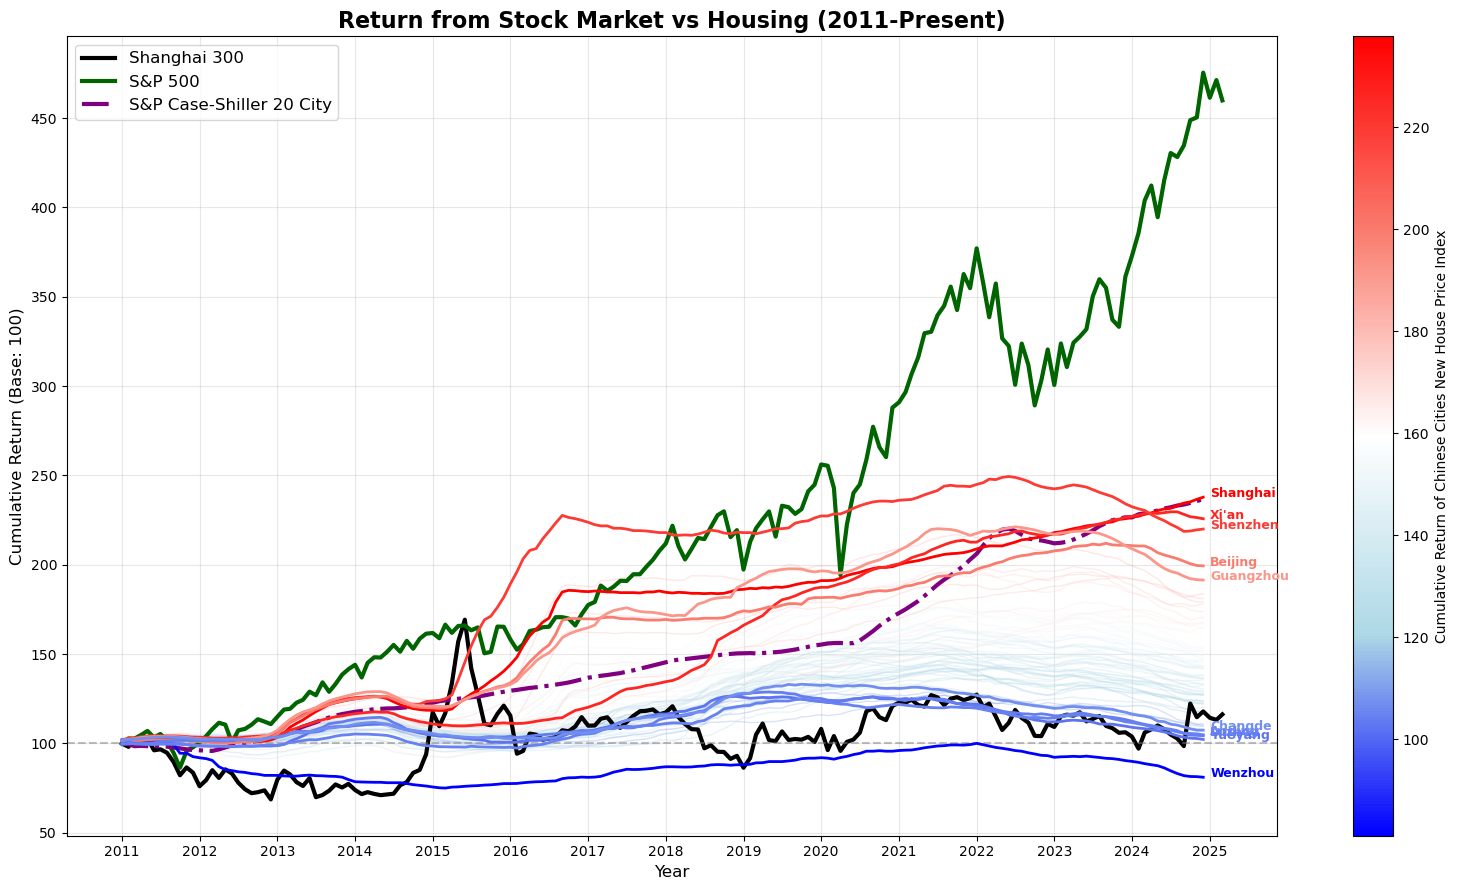

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl
import pandas_datareader.data as web

# Load Chinese housing price data
def load_housing_data(file_path):
    df = pd.read_csv(file_path)
    
    # Group data by city
    city_data = {}
    
    for city in df['city'].unique():
        city_df = df[df['city'] == city].sort_values(by=['year', 'month'])
        
        # Add date column for plotting
        city_df['date'] = pd.to_datetime(city_df[['year', 'month']].assign(day=1))
        
        # Initialize baseline value (December 2010 = 100)
        cumulative_value = 100
        
        # Calculate monthly cumulative values
        cumulative_values = []
        
        for _, row in city_df.iterrows():
            if pd.notna(row['new_house_price_index']):
                cumulative_value = cumulative_value * (row['new_house_price_index'] / 100)
            cumulative_values.append(cumulative_value)
        
        city_df['new_house_cumulative'] = cumulative_values
        city_data[city] = city_df
    
    return city_data

# Main function
def plot_comprehensive_comparison(housing_file_path):
    # Set start and end dates
    start_date = '2011-01-01'
    end_date = datetime.now().strftime('%Y-%m-%d')
    
    print("1. Loading Chinese housing price data...")
    city_data = load_housing_data(housing_file_path)
    
    print("2. Downloading market index data...")
    # Download Shanghai Index and S&P 500 Index data
    market_indices = {
        'Shanghai 300': '000001.SS',
        'S&P 500': '^GSPC'
    }
    
    index_data = {}
    
    for name, ticker in market_indices.items():
        try:
            data = yf.download(ticker, start=start_date, end=end_date)
            print(f"Successfully downloaded {name} index data, total of {len(data)} trading days")
            
            if not data.empty:
                # Use Close column for calculations
                if 'Close' in data.columns:
                    # Convert daily data to monthly data
                    monthly_data = data['Close'].resample('MS').first()  # MS = Month Start
                    index_data[name] = monthly_data
                    print(f"Converted {name} to monthly data, total of {len(monthly_data)} monthly data points")
                else:
                    print(f"Error: Cannot find Close column in {name} data")
            else:
                print(f"Error: {name} data is empty")
        except Exception as e:
            print(f"Error downloading {name}: {e}")
    
    print("3. Downloading Case-Shiller index data from FRED...")
    try:
        # Use FRED data source to get Case-Shiller 20-city index
        case_shiller = web.DataReader('SPCS20RSA', 'fred', start_date, end_date)
        print(f"Successfully downloaded Case-Shiller index data, total of {len(case_shiller)} data points")
        # Get column name (usually SPCS20RSA)
        cs_column = case_shiller.columns[0]
        index_data['S&P Case-Shiller 20 City'] = case_shiller[cs_column]
    except Exception as e:
        print(f"Error downloading Case-Shiller index data from FRED: {e}")
        print("Creating simulated data for demonstration...")
        # Create simulated data, for demonstration purposes only
        date_range = pd.date_range(start=start_date, end=end_date, freq='MS')
        # Assume 5% annual growth, convert to monthly growth rate
        monthly_growth = 1.05**(1/12)
        case_shiller_series = pd.Series([100 * (monthly_growth ** i) for i in range(len(date_range))], index=date_range)
        index_data['S&P Case-Shiller 20 City'] = case_shiller_series
        print("Created simulated Case-Shiller index data for demonstration")
    
    print("4. Creating chart...")
    # Create chart
    plt.figure(figsize=(16, 10))
    ax = plt.subplot()
    
    # Create custom color map (blue to red)
    colors = ['blue', 'lightblue', 'white', 'salmon', 'red']
    cm = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)
    
    # Find final return rates for all cities
    final_returns = {}
    for city, data in city_data.items():
        if not data.empty and 'new_house_cumulative' in data and not data['new_house_cumulative'].empty:
            final_returns[city] = data['new_house_cumulative'].iloc[-1]
    
    # Find maximum and minimum return rates for color normalization
    min_return = min(final_returns.values())
    max_return = max(final_returns.values())
    norm = mpl.colors.Normalize(vmin=min_return, vmax=max_return)
    
    # Plot new house price index for each Chinese city
    for city, data in city_data.items():
        if city in final_returns:
            # Get color
            color_val = norm(final_returns[city])
            city_color = cm(color_val)
            
            # Plot city line
            plt.plot(data['date'], data['new_house_cumulative'], 
                    color=city_color, alpha=0.3, linewidth=1)
    
    # Prepare styles for market indices
    index_styles = {
        'Shanghai 300': {'color': 'black', 'linewidth': 3, 'linestyle': '-', 'alpha': 1.0},
        'S&P 500': {'color': 'darkgreen', 'linewidth': 3, 'linestyle': '-', 'alpha': 1.0},
        'S&P Case-Shiller 20 City': {'color': 'purple', 'linewidth': 3, 'linestyle': '-.', 'alpha': 1.0}
    }
    
    index_returns = {}
    
    # Calculate and plot market indices
    for name, series in index_data.items():
        # Normalize to start from 100
        normalized = series / series.iloc[0] * 100
        plt.plot(normalized.index, normalized, 
                label=f'{name}', 
                **index_styles[name])
        
        # Save final return rate
        index_returns[name] = float(normalized.iloc[-1])
    
    # Add horizontal line marking starting point
    plt.axhline(y=100, color='gray', linestyle='--', alpha=0.5)
    
    # Find top and bottom performing cities to label
    top_cities = sorted(final_returns.items(), key=lambda x: x[1], reverse=True)[:5]
    bottom_cities = sorted(final_returns.items(), key=lambda x: x[1])[:5]
    
    # Add labels for top and bottom cities
    for city, final_return in top_cities + bottom_cities:
        city_data_current = city_data[city]
        if not city_data_current.empty:
            last_date = city_data_current['date'].iloc[-1]
            last_value = city_data_current['new_house_cumulative'].iloc[-1]
            
            plt.plot(city_data_current['date'], city_data_current['new_house_cumulative'],
                    color=cm(norm(final_return)), linewidth=2)
            
            plt.annotate(city, 
                        xy=(last_date, last_value),
                        xytext=(5, 0), 
                        textcoords='offset points',
                        fontsize=9,
                        color=cm(norm(final_return)),
                        fontweight='bold')
    
    # Add color bar
    sm = plt.cm.ScalarMappable(cmap=cm, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label('Cumulative Return of Chinese Cities New House Price Index', fontsize=10)
    
    # Set title and labels
    plt.title('Return from Stock Market vs Housing (2011-Present)', 
             fontsize=16, fontweight='bold')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Cumulative Return (Base: 100)', fontsize=12)
    
    # Format x-axis dates
    years = mdates.YearLocator()
    years_fmt = mdates.DateFormatter('%Y')
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)
    
    # Add grid lines
    plt.grid(True, alpha=0.3)
    
    # Add legend
    plt.legend(fontsize=12)
    
    # Build text description
    # text_info = "Market Indices Returns:\n"
    # for name, value in index_returns.items():
    #     text_info += f"{name} Index: {(value-100):.2f}%\n"
    
    # text_info += "\nTop 5 Chinese Cities: " + ", ".join([f"{city}: {(return_val-100):.2f}%" for city, return_val in top_cities])
    # text_info += "\nBottom 5 Chinese Cities: " + ", ".join([f"{city}: {(return_val-100):.2f}%" for city, return_val in bottom_cities])
    
    # Add text box
    # plt.figtext(0.5, 0.01, text_info, ha='center', fontsize=10, 
    #             bbox=dict(facecolor='white', alpha=0.8, edgecolor='lightgray'))
    
    # Save chart
    plt.tight_layout(rect=[0, 0.07, 1, 0.97])
    plt.savefig('comprehensive_market_comparison.png', dpi=300, bbox_inches='tight')
    plt.savefig('comprehensive_market_comparison.pdf', format='pdf', bbox_inches='tight')
    print("Chart saved as 'comprehensive_market_comparison.png' and 'comprehensive_market_comparison.pdf'")
    
    # Display chart
    plt.show()

# Execute function
if __name__ == "__main__":
    housing_file_path = "merged_housing_data_eng.csv"  # Replace with your housing price data file path
    plot_comprehensive_comparison(housing_file_path)